<a href="https://colab.research.google.com/github/gravity102424/ESAA/blob/main/ESAA_YB_week13_1_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 03. 평균 이동

## 평균(Mean Shift)의 개요

평균(Mean Shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다. 하지만 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.

평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는다. 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수(probability density function)를 이용한다. 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)를 이용한다.

평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아낸다.

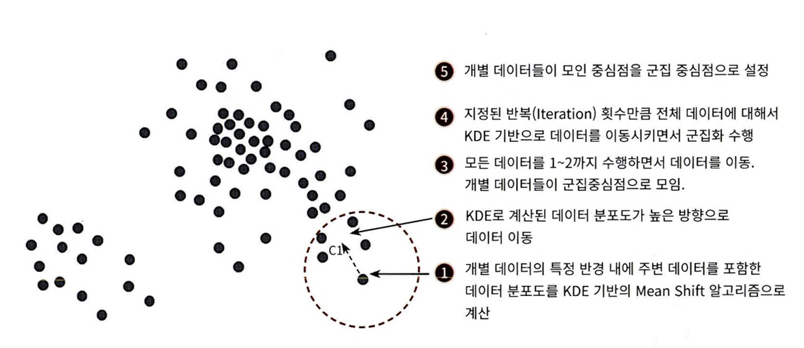

KDE(Kernel Density Estimation)는 커널(Kern이) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다. 확률 밀도 함수 PDF(Probability Density Function)는 확률 변수의 분포를 나타내는 함수로, 널리 알려진 정규분포 함수를 포함해 감마 분포, t-분포 등이 있다. 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성(가령 정규 분포의 경우 평균, 분산), 확률 분포 등 변수의 많은 요소를 알 수 있다.

KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용된다. 다음 그림의 왼쪽은 개별 관측 데이터에 가우시안 커널 함수를 적용한 것이고 오른쪽은 적용 값을 모두 더한 KDE 결과이다.

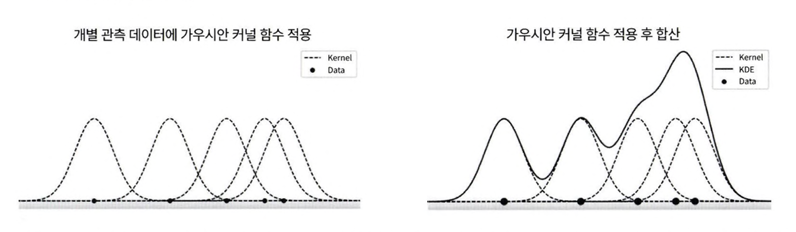

KDE는 다음과 같은 커널 함수식으로 표현된다. 다음 식에서 K는 커널 함수, x는 확률 변숫값, xi는 관측값, h는 대역폭(bandwidth)이다.

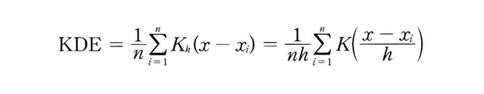

대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있습니다. 다음 그림은 h 값을 증가시키면서 변화되는 KDE를 나타낸다. 작은 h 값(h=1.0)은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉽다. 반대로 매우 큰 h 값(h=10)은 과도하게 평활화(smoothing)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합(under-fitting)하기 쉽다. 따라서 적절한 KDE의 대역 폭 으를 계산하는 것은 KDE 기반의 평균 이동(Mean Shift) 군집화에서 매우 중요하다.

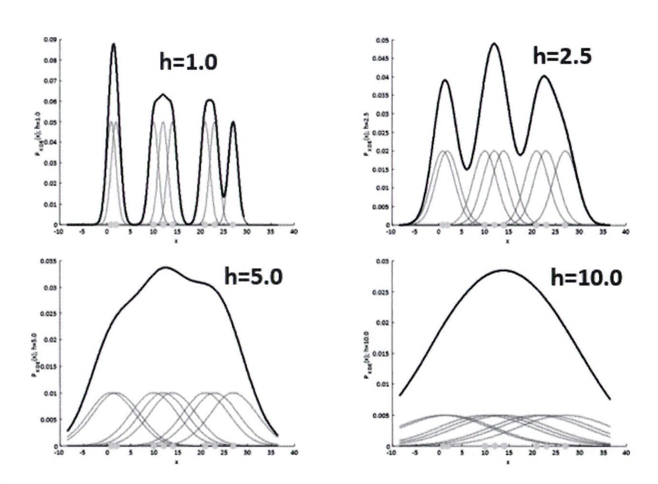

일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가진다. 또한 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행한다. 사이킷런은 평균 이동 군집화를 위해 MeanShift 클래스를 제공한다. MeanShift 클래스의 가장 중요한 초기화 파라미터는 bandwidth이며 이 파라미터는 KDE의 대역폭 h와 동일하다. 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기 때문에 사이킷런은 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공한다. 다음 예제는 make_blobs()의 cluster_std를 0.7로 정한 3개 군집의 데이터에 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘을 적용한 예제이다.



In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


군집이 0부터 5까지 6개로 분류됐다. 지나치게 세분화돼 군집화됐다. 일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아진다. 이번에 bandwidth를 살짝 높인 1.0으로 해서 MeanShift를 수행해 보겠다.

In [12]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


3개의 군집으로 잘 군집화됐다. 데이터의 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 큰 영향을 미칠 수 있습니다. 따라서 MeanShift에서는 이 bandwidth를 최적화 값으로 설정하는 것이 매우 중요하다. 사이킷런은 최적화된 bandwidth 값을 찾기 위해서 estimate_bandwidth( )
함수를 제공한다. estimate_bandwidth()의 파라미터로 피처 데이터 세트를 입력해주면 최적화된
bandwidth 값을 반환해준다.

In [13]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


estimate_bandwidth( )로 측정된 bandwidth# 평균 이동 입력값으로 적용해 동일한 make_blobs() 데이터 세트에 군집화를 수행해 보겠다.

In [14]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 :',np.unique(cluster_labels))

cluster labels 유형 : [0 1 2]


3개의 군집으로 구성됨을 알 수 있다. 구성된 3개의 군집을 시각화해 보겠다. 평균 이동도 K-평균과 유사하게 중심을 가지고 있으므로 cluster_centers_ 속성으로 군집 중심 좌표를 표시할 수 있다.

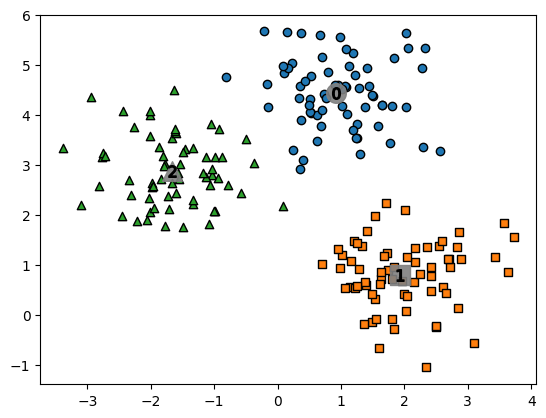

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster = clusterDF [clusterDF['meanshift_label']==label]
  center_x_y = centers[label]
  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
            marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

 target 값과 군집 label 값을 비교해 보겠습니다. Target 값과 군집 label 값이 1:1로 잘 매칭됐다.

In [18]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


평균 이동의 장점은 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능한 것이다. 또한 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없다. 하지만 알고리즘의 수행 시간이 오래 걸리고 무엇보다도 band-width의 크기에 따른 군집화 영향도가 매우 크다.

이 같은 특징 때문에 일반적으로 평균 이동 군집화 기법은 분석 업무 기반의 데이터 세트보다는 컴퓨터
비전 영역에서 더 많이 사용된다. 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적
하는 데 뛰어난 역할을 수행하는 알고리즘이다.

## 04. GMM(Gaussian Mixture Model) 소개

GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식이다.
정규 분포(Normal distribu tion)로도 알려진 가우시안 분포는 좌우 대칭형의 종(Bell) 형태를 가진
통계학에서 가장 잘 알려진 연속 확률 함수이다.

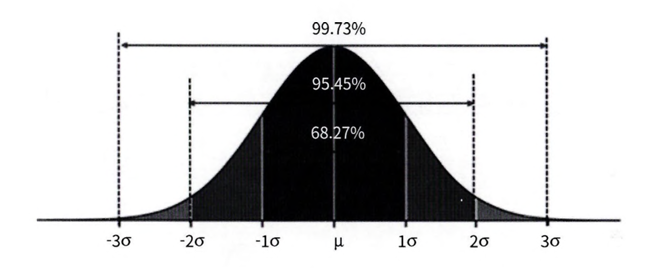

정규 분포는 평균 $\mu$를 중심으로 높은 데이터 분포도를 가지고 있으며, 좌우 표준편차 1 에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45%를 가지고 있다. 평균이 0이고, 표준편차가 1인 정규 분포를 표준 정규 분포라고 한다.

GMM(Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주한다. 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한다. 먼저 다음과 같이 세 개의 가우시안 분포 A, B, C를 가진 데이터 세트가 있다고 가정하겠다.

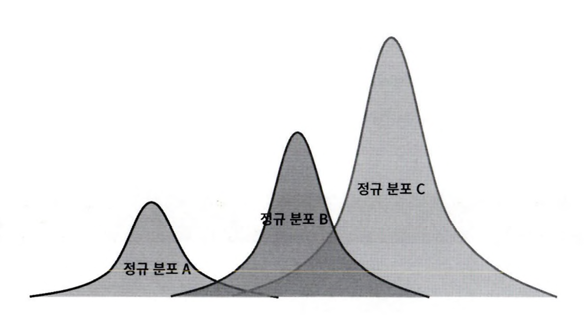

이 세 개의 정규 분포를 합치면 다음 형태가 될 것이다.

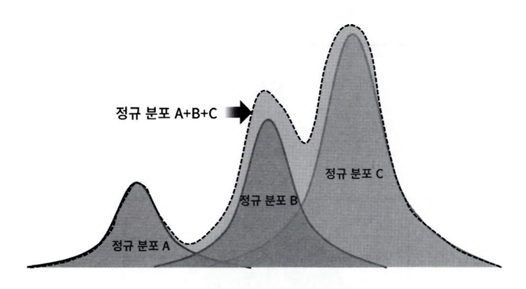

군집화를 수행하려는 실제 데이터 세트의 데이터 분포가 다음과 같다면 쉽게 이 데이터 세트가 정규 분포 A, B, C가 합쳐서 된 데이터 분포도임을 알 수 있다.

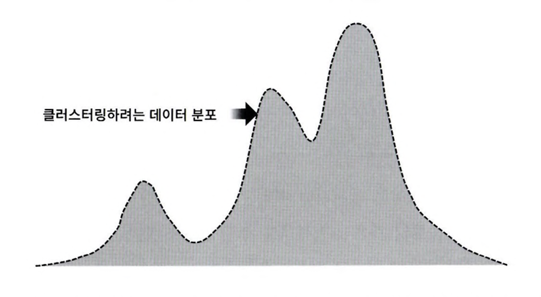

전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화을 수행하는 것이 GMM 군집화 방식이다. 가령 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식이다.

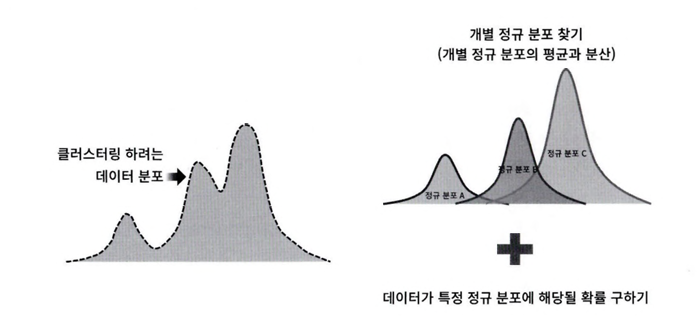

이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수 추정은 대표적으로 2가지를 추정하는 것이다.


* 개별 정규 분포의평균과 분산
* 각 데이터가 어떤 정규 분포에 해당되는지의 확률


이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용합니다. EM 알
고리즘에 대한 설명은 더 많은 수학식이 필요하므로 이 책에서는 생략하겠습니다. 사이킷런은 이러한
GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 GaussianMixture 클래스를 지원합니다.

## GMM을 이용한 붓꽃 데이터 세트 군집화
GMM은 확률 기반 군집화이고 K-평균은 거리 기반 군집화이다. 이번에는 붓꽃 데이터 세트로 이 두 가지 방식을 이용해 군집화를 수행한 뒤 양쪽 방식을 비교해 보겠다.

In [19]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as pit
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal—width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components이다. n_components는
gaussian mixture의 모델의 총 개수이다. K-평균의 n_cl니sters와 같이 군집의 개수를 정하는 데
중요한 역할을 수행한다. n_components를 3으로 설정하고 GaussianMixture로 군집화를 수행하겠다(GaussianMixture 클래스는 sklearn.mixture 패키지에 위치해 있음에 유의하자). GaussianMixture 객체의 fit(피처 데이터 세트)와 predict(피처 데이터 세트)를 수행해 군집을 결정한 뒤 irisDF DataFrame에 'gmm_cluster' 칼럼명으로 저장하고 나서 타깃별로 군집이 어떻게 매핑됐는지 확인해 보겠다.

In [21]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmicluster' 칼럼명으로 저장
irisDF ['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF .groupby(['target'])['gmm_cluster']. value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


Target 0은 cluster 0으로, Target 2는 duster 1 로 모두 잘 매핑됐습니다. Target 1만 cluster 2로 45
개(90%), cluster 1로 5개(10%) 매핑됐습니다. 앞 절의 붓꽃 데이터 세트의 K-평균 군집화 결과보다
더 효과적인 분류 결과가 도출됐습니다. 붓꽃 데이터 세트의 K-평균 군집화를 수행한 결과를 보겠습
니다

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


이는 어떤 알고리즘에 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미이다. K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있다.

## GMM과 K—평균의 비교
KMeans는 원형의 범위에서 군집화를 수행한다. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다. 다음은 make_blobs()의 군집의 수를 3개로 하되, cluster_std를 0.5로 설정해 군집 내의 데이터를 뭉치게 유도한 데이터 세트에 KMeans를 적용한 결과이다. 이렇게 cluster_std를 작게 설정하면 데이터가 원형 형태로 분산될 수 있다. 결과를 보면 KMeans로 효과적으로 군집화된 것을 알 수 있다.

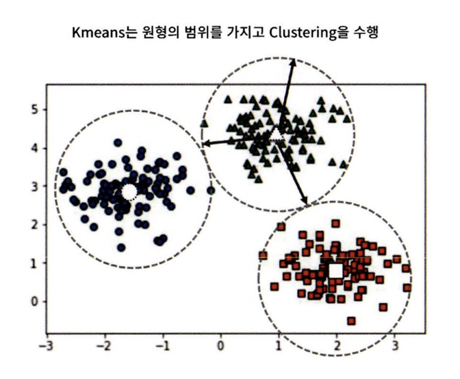

KMeans 군집화는 개별 군집의 중심에서 원형의 범위로 데이터를 군집화했다. 하지만 데이터가 원형의 범위로 퍼져 있지 않는 경우에는 어떨까? KMeans는 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못한다. 다음에서 해당 데이터 세트를 make_blobs()의 데이터를 변환해 만들어보겠다. 앞으로도 군집을 자주 시각화하므로 이를 위한 별도의 함수
를 만들어 이용하겠다. 함수명은 visualize_cluster_plot(clusterobj, dataframe, label_name, iscluster=True)이다. visualize_cluster_plot() 함수는 인자로 다음과 같은 값을 입력받는다.

* clusterobj: 사이킷런의 군집 수행 객체. KMeans나 GaussiarWixture의 fit( )와 predict( )로 군집화를 완료한 객체. 만약 군집화 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력

* dataframe: 피처 데이터 세트와 label 값을 가진 DataFrame

* label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명, make_blobs( ) 결과 시각화일 경우는 dataframe 내의 target 칼럼명
* iscenter: 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

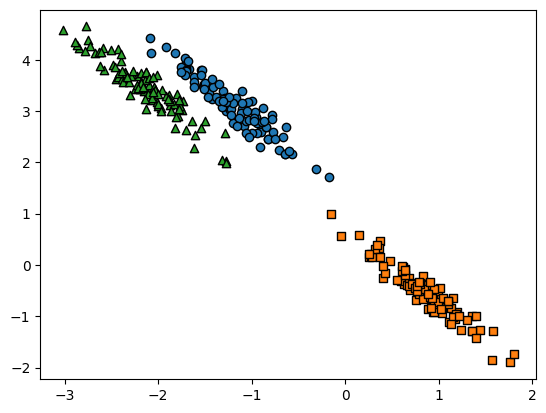

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

%matplotlib inline

def visualize_cluster_plot(cluster_result=None, dataframe=None, label_name='target', iscenter=True):
    if dataframe is None:
        print("Error: DataFrame is required.")
        return

    unique_labels = np.unique(dataframe[label_name])
    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                    marker=markers[label % len(markers)])

        if iscenter and cluster_result is not None and hasattr(cluster_result, 'cluster_centers_'):
            # Assuming cluster_result has a .cluster_centers_ attribut
            center_x_y = cluster_result.cluster_centers_[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
                        marker=markers[label % len(markers)])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                        marker='$%d$' % label)
    plt.show()

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 세트와 make_blobs( )의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


위와 같이 만들어진 데이터 세트에서는 KMeans의 군집화 정확성이 떨어지게 된다. KMeans가 위 데이터 세트를 어떻게 군집화하는지 확인해 보겠다.

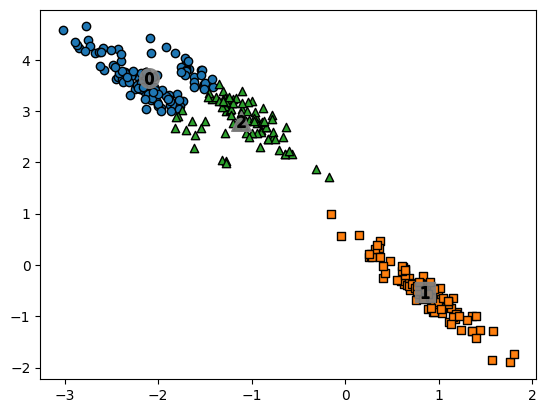

In [29]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성
되지 않음을 알 수 있습니다. KMeans가 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으
로 군집을 구성하면서 위와 같이 길쭉한 방향으로 데이터가 밀접해 있을 경우에는 최적의 군집화가 어
렵습니다. 이번에는 GMM으로 군집화를 수행해 보겠습니다.

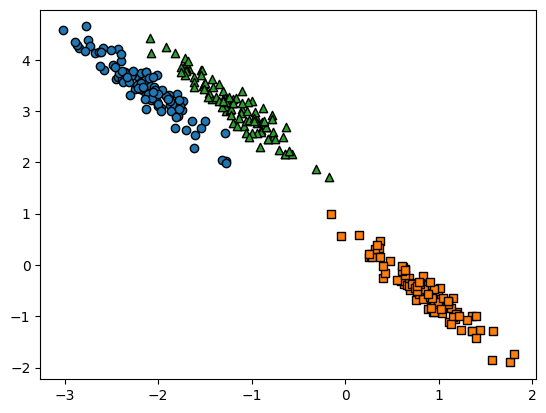

In [33]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF ['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

데이터가 분포된 방향에 따라 정확하게 군집화됐음을 알 수 있다. GMM은 K-평균과 다르게 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 visualize_cluster_plot( )에서 시각화되지 않는다.make_blobs()의 target 값과 KMeans, GMM의 군집 Label 값을 서로 비교해 위와 같은 데이터 세트에서 얼만큼의 군집화 효율 차이가 발생하는지 확인해 보겠다.

In [34]:
print('### KMeans Clustering ###')
print (clusterDF.groupby('target')['kmeans_label']. value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label']. value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


KMeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target 값과 어긋나는 경우가 발생하고 있다. 하지만 GMM의 경우는 군집이 target 값과 잘 매핑돼 있다.

이처럼 GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있다. 하지만 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있다.